<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/Forecasting_Time_series_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
data =pd.read_csv("/content/BTC_USD_2013-10-01_2021-07-20-CoinDesk.csv",index_col=["Date"],
                            parse_dates=["Date"])

In [4]:
data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
bitcoin_data = pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})

In [6]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2849 entries, 2013-10-01 to 2021-07-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2849 non-null   float64
dtypes: float64(1)
memory usage: 44.5 KB


In [7]:
import matplotlib.pyplot as plt


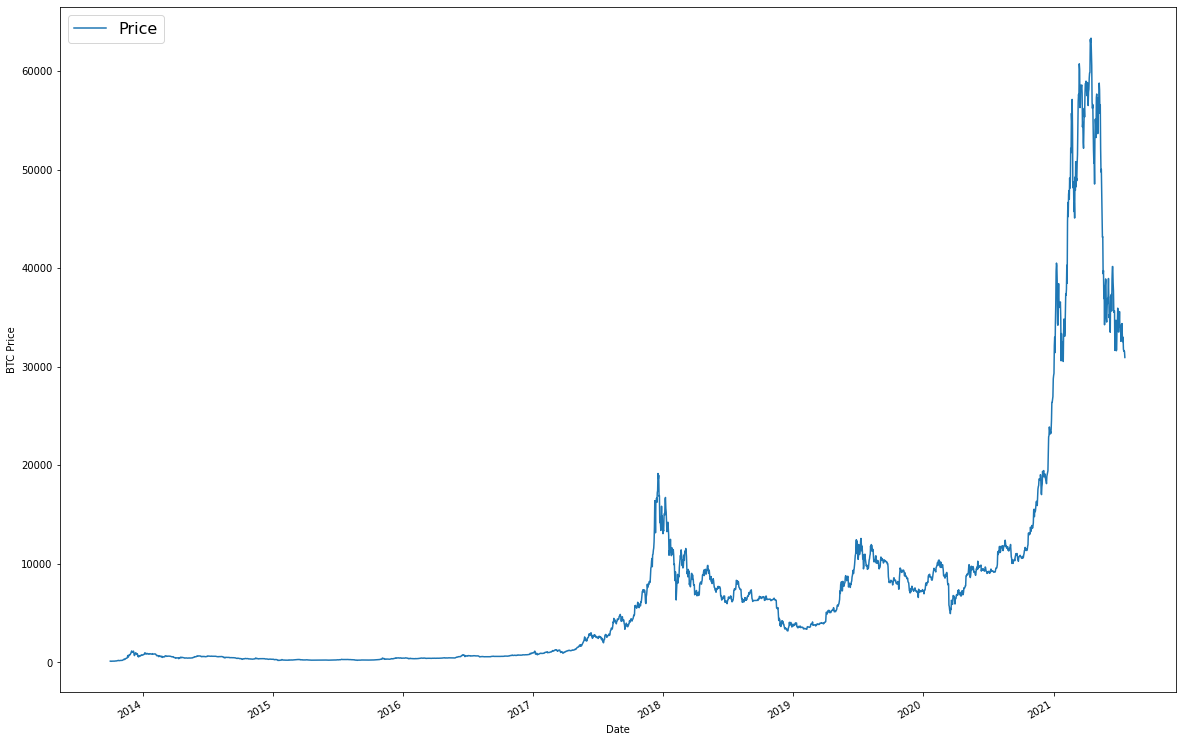

In [8]:
bitcoin_data.plot(figsize=(20,14))
plt.ylabel("BTC Price")
plt.legend(fontsize=16)

#Lets split the data in Train and Test set


In [9]:

bitcoin_data.reset_index(inplace=True)



In [10]:
bitcoin_data.head()

,Date,Price
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


In [11]:
train_split=int(0.8*len(bitcoin_data))
train_split,len(bitcoin_data)

(2279, 2849)

In [12]:
price=bitcoin_data["Price"]

In [13]:
X_train,y_train=bitcoin_data.Date[:train_split], bitcoin_data.Price[:train_split]
X_test, y_test = bitcoin_data.Date[train_split:], bitcoin_data.Price[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2279, 570, 2279, 570)

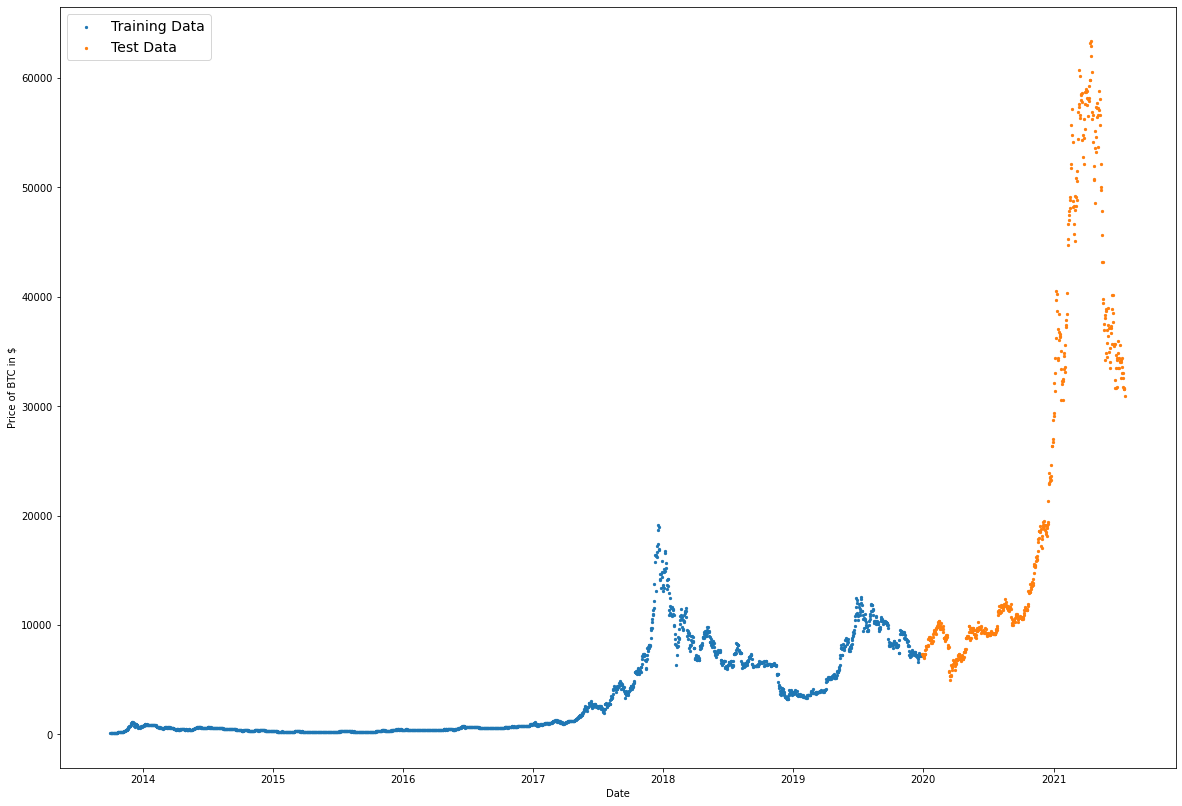

In [14]:
#lets plot the split data to check how it looks.
plt.figure(figsize=(20,14))
plt.scatter(X_train, y_train, s=5, label="Training Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.xlabel("Date")
plt.ylabel("Price of BTC in $")
plt.legend(fontsize=14)
plt.show();

# Let write a helper function to plot time series data 

In [15]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end],format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

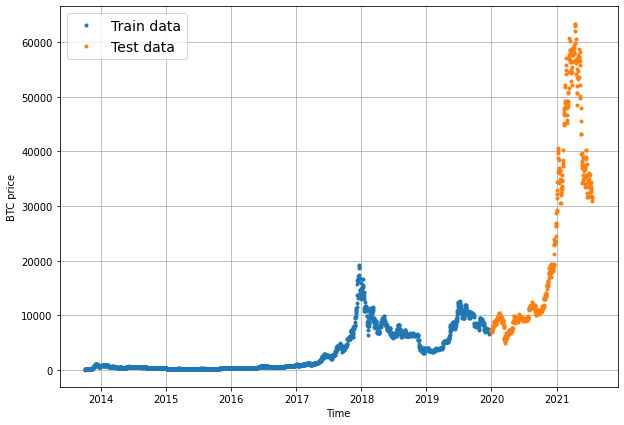

In [16]:
# test the plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train,label="Train data")
plot_time_series(timesteps=X_test, values=y_test,label="Test data")

**Modelling Experiments**

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

Horizon = number of timesteps into the future we're going to predict

Window size = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:

0 Naïve model (baseline)

1 Dense model, horizon = 1, window = 7

2 Same as 1, horizon = 1, window = 30

3 Same as 1, horizon = 7, window = 30

4 Conv1D

5 LSTM

6 Same as 1 (but with multivariate data)

7 N-BEATs Algorithm

8 Ensemble (multiple models optimized on different loss 
functions)

9 Future prediction model (model to predict future values)

10 Same as 1 (but with turkey 🦃 data introduced)
Model 0: Naive forecast (baseline)
The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$
In English:

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [17]:
y_test[:10]

2279    7311.560644
2280    7385.464848
2281    7251.276794
2282    7179.957819
2283    7174.744012
2284    6955.487580
2285    7291.219505
2286    7337.636670
2287    7347.433264
2288    7713.860754
Name: Price, dtype: float64

In [18]:
# Create naive forecast
naive_forecast=y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(2279    7311.560644
 2280    7385.464848
 2281    7251.276794
 2282    7179.957819
 2283    7174.744012
 2284    6955.487580
 2285    7291.219505
 2286    7337.636670
 2287    7347.433264
 2288    7713.860754
 Name: Price, dtype: float64, 2838    33994.676989
 2839    33543.701836
 2840    34382.650691
 2841    33032.377732
 2842    32544.844908
 2843    33003.812922
 2844    31783.171349
 2845    31596.294383
 2846    31640.918127
 2847    31537.805190
 Name: Price, dtype: float64)

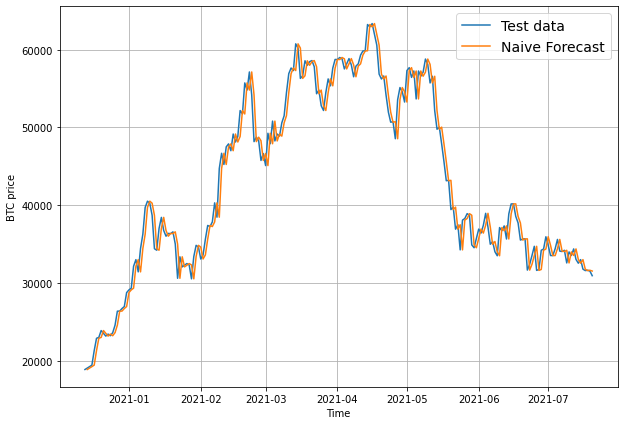

In [19]:

# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

In [20]:
import tensorflow as tf
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [21]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 676.89923,
 'mape': 2.663921,
 'mase': 0.99843407,
 'mse': 1419703.8,
 'rmse': 1191.5132}

In [22]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [23]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [24]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [25]:
price=price.to_numpy()

In [26]:

full_windows, full_labels = make_windows(price, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2842, 2842)

In [27]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [28]:

# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2273, 569, 2273, 569)

Make a modelling checkpoint callback
Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [29]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)
  

Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:


- A single dense layer with 128 hidden units and ReLU

- An output layer with linear activation (no activation)

- Adam optimizaiton and MAE loss function

- Batch size of 128 (previously we've used 32)

- 100 epochs

In [30]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 13ms/step - loss: 777.5195 - mae: 777.5195 - mse: 2259760.7500 - val_loss: 2630.6304 - val_mae: 2630.6304 - val_mse: 15547435.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 238.0271 - mae: 238.0271 - mse: 246383.9219 - val_loss: 1222.8434 - val_mae: 1222.8434 - val_mse: 4478231.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 189.8531 - mae: 189.8531 - mse: 171759.7344 - val_loss: 1102.1593 - val_mae: 1102.1593 - val_mse: 3646911.7500
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 166.6330 - mae: 166.6330 - mse: 145201.3594 - val_loss: 1097.3384 - val_mae: 1097.3384 - val_mse: 3313304.5000
INFO:tensorflow:Assets written to: mode

In [31]:
model_1=tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 681.8966 - mae: 681.8966 - mse: 1448373.6250


[681.8966064453125, 681.8966064453125, 1448373.625]

In [32]:
#lets make function for getting prediction.

def make_preds(model, input_data):
  '''
  Function uses model to predict the values on input data.
  '''

  predicted_values = model.predict(input_data)
  return tf.squeeze(predicted_values) # return 1D array of predictions
  


In [33]:
model_1_preds = make_preds(model_1, test_windows)

In [34]:
#Evaluate  predicitons
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 681.8966,
 'mape': 2.7138205,
 'mase': 1.0058053,
 'mse': 1448373.5,
 'rmse': 1203.4839}

In [35]:
naive_results


{'mae': 676.89923,
 'mape': 2.663921,
 'mase': 0.99843407,
 'mse': 1419703.8,
 'rmse': 1191.5132}

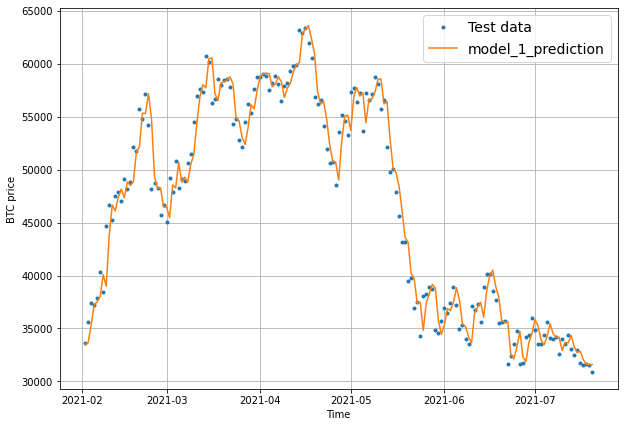

In [36]:
# Lets plot model1 Predictions against test data
offset=400
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label="Test data"
                 )

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label="model_1_prediction"
                 )

# Model 2 dense(Window = 30 , horizon -1)

In [36]:
HORIZON = 1 
WINDOW_SIZE = 30

In [45]:
# Make windowed data wiht appropriate horizon and window sizes

full_windows, full_labels = make_windows(price, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows),len(full_labels)

(2842, 2842)

In [47]:
# lets split the data in training and test data
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows),len( test_windows), len(train_labels),len(test_labels)

(2273, 569, 2273, 569)

In [50]:
# Building the model now.

tf.random.set_seed(42)

# Crete a model 
model_2 = tf.keras.Sequential([
                    tf.keras.layers.Dense(128,'relu'),
                    tf.keras.layers.Dense(HORIZON)           
], name="model_2_dense")

# compile a model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)] ) 

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [53]:
# Evaluate model 2 on test data

model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 767.4809 - mae: 767.4809


[767.4808959960938, 767.4808959960938]

In [55]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 681.8965 - mae: 681.8965


[681.8965454101562, 681.8965454101562]

In [60]:
model_2_preds = make_preds(model=model_2,input_data=test_windows)
# Lets evaluate the model results

model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

{'mae': 681.89655,
 'mape': 2.71382,
 'mase': 1.0058051,
 'mse': 1448373.4,
 'rmse': 1203.4839}

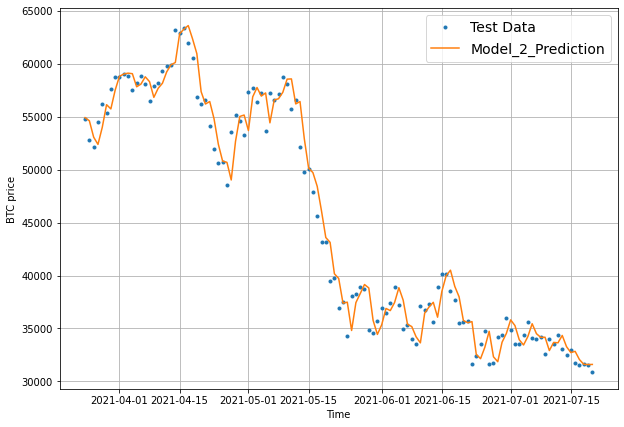

In [62]:
# plot the predictions against the test data
offset=450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels,
                 start=offset,
                 label="Test Data"
                 )


plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format='-',
                 label="Model_2_Prediction"
                 )